# Ordinary Least Squares (OLS) Estimator

**Introduction**

This notebook demonstrates the implementation of an Ordinary Least Squares (OLS) Estimator for linear regression. OLS is one of the most fundamental techniques used to model the relationship between a dependent variable and one or more independent variables by minimizing the sum of the squared differences between the observed and predicted values.

**Key Concepts:**

* **Linear Regression:** A method to predict the value of a dependent variable based on the values of independent variables
* **OLS Estimation:** The process of finding the line (or hyperplane) that best fits the data by minimizing the sum of squared residuals.

**Steps in this Notebook:**

1. Data Loading: Import the dataset and perform basic data exploration.
2. Data Preprocessing: Clean and preprocess the dataset for linear regression.
3. OLS Estimation:
    * Formulate the linear regression model.
    * Use OLS to estimate the coefficients of the independent variables.
4. Model Evaluation: Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared to assess its performance.
5. Visualization: Plot the regression line and residuals to visualize the fit of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_squared_errors(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return mean_error;

def train_model(x, y):
    '''Calculate weights'''
    x.astype(float)
    first = np.dot(x.T, x)
    first.astype(np.float16)
    inverse = np.linalg.inv(first)
    second = np.dot(x.T, y)
    b = np.dot(inverse, second)
    return b;

def add_bias(x):
    if(len(x.shape) == 1):
        x=x[:, np.newaxis]
    b = np.ones((x.shape[0], 1))
    x = np.concatenate((b,x), axis = 1)
    return x

def predict(x, b):
    return (np.dot(x, b))

In [3]:
df = pd.read_csv('/kaggle/input/mpg-car-data/MpgData_with_Cateogeries.csv')

col = df.columns
we = df.to_numpy()
we = we[:, 0:8]
we=we.astype(np.float64)

In [4]:
xtrain=we[:292, 1:8]
ytrain=we[:292, 0]
xtest=we[292:, 1:8]
ytest=we[292:, 0]

In [5]:
for i in range(2,8):
    x_train = add_bias(xtrain[:, 0:i])
    b = train_model(x_train,ytrain)
    train_predict = predict(x_train, b)
    train_error = mean_squared_errors(ytrain, train_predict)
    print('{} Variables training error is {}'.format(i, train_error))

2 Variables training error is 10.83358154512922
3 Variables training error is 10.476388388884441
4 Variables training error is 8.132889689912501
5 Variables training error is 8.101001431734586
6 Variables training error is 7.056627385554312
7 Variables training error is 6.782307383282699


/tmp/ipykernel_17/1790916469.py:13: RuntimeWarning: overflow encountered in cast
  first.astype(np.float16)


/tmp/ipykernel_17/1790916469.py:13: RuntimeWarning: overflow encountered in cast
  first.astype(np.float16)


[ 8.94572151e+00 -3.88971440e-01  8.43487860e-03 -1.76425571e-02
 -5.26407129e-03 -5.58602715e-02  4.03539780e-01  1.02008251e+00]


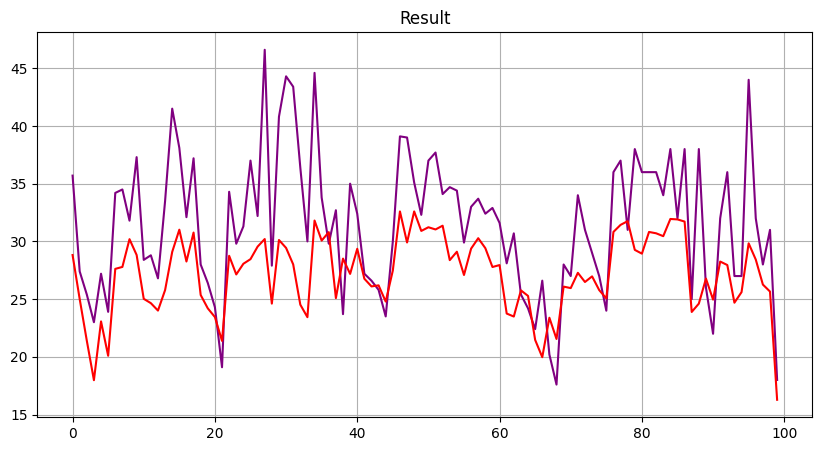

In [6]:
x_train=add_bias(xtrain)
x_test=add_bias(xtest)
b=train_model(x_train,ytrain)
print(b)
test_predict = predict(x_test, b)
plt.figure(figsize=(10,5))
plt.title('Result')
plt.grid(True)
plt.plot(ytest, color='purple')
plt.plot(test_predict, color='red')
plt.show()